<a href="https://colab.research.google.com/github/massaoiwanaga/topespsi/blob/main/TESI_VAC_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Disciplina Topicos Especiais em Sistemas de Informação I**

---

## **Saúde (COVID-19)**

> Alessandra Pierro Saraiva
>
> Fabiane Monteiro Carvalho
>
> Massao Oliveira Iwanaga

## Importando a biblioteca pandas

In [1]:
# importando a biblioteca
import pandas as pd # pandas
import numpy as np  # numpy
import matplotlib.pyplot as plt                # importar a biblioteca matplotlib

## Instalação da biblioteca PROV

In [3]:
#Instalação da biblioteca PROV no ambiente COLAB
#Essa biblioteca implementa em Python o Modelo de Dados PROV da W3C
!pip install prov

## Acessar dados do Google Drive

In [2]:
# Se você está executando o notebook no Google Colab, é necessário montar o drive para o ambiente virtual do Google Drive
# Clicar no link que aparecerá e será gerada uma chave, que deverá ser colada no campo "Autorization code"

from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Informações de proveniência

In [6]:
# Working with PROV
# Pyhton 3.7.10 - Colab notebook

import sys, subprocess, datetime, random
from prov.model import ProvDocument                                                 #PROV Library


In [5]:
# Retrospective Provenance variables
agent    = input("Enter the name of the AGENT WHO is running the program: ")        #PROV-Agent
entity   = input("Enter the name of the ENTITY dataset: ")                          #PROV-Entity
activity = input("Enter the name of the ACTIVITY: ")                                #PROV-Activity
graph = entity                                                                      #PROV-Graph

Enter the name of the AGENT WHO is running the program: Alessandra
Enter the name of the ENTITY dataset: Vacinação
Enter the name of the ACTIVITY: teste


In [6]:
### BEGIN - Registering Retrospective Provenance -             #PROV-MODEL

# Creating an empty provenance document
d1 = ProvDocument()                                                 

In [7]:
# Declaring namespaces for various prefixes used in the excution of the experiment
d1.add_namespace('ufrj', 'http://www.ufrj.br/ppgi/')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('greco', 'http://www.ufrj.br/ppgi/greco/#')

# Adding an entity
entity = "ufrj:"+ entity
e1 = d1.entity(entity)

# Adding an Agent 
agent = "foaf:"+ agent
d1.agent(agent)

# Attributing the execution of the experiment to the PROV-Agent
d1.wasAttributedTo(e1, agent)

# Adding an activity
activity = "greco:"+ activity
d1.activity(activity)

# Generation
d1.wasGeneratedBy( entity, activity)

<ProvGeneration: (ufrj:Vacinação, greco:teste)>

In [8]:
# Adding a role to the PROV-Agent and timestamp to dataset
d1.agent(agent, {'prov:hadRole': 'Executor', 'foaf:mbox': 'massaoiwanaga@ufrj.br', 'prov:attributedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})

### END - Registering Retrospective Provenance 

<ProvEntity: ufrj:Vacinação>

In [11]:
### Optional outputs ####

#Generating the outup - a  Provenance Graph
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
graph = graph +".png"
dot.write_png('/content/drive/My Drive/TESI_FCD/'+graph)

In [12]:
#Generating the Serialization - Output XML
d1.serialize(entity + ".xml", format='xml') 

#Generating the Serialization - Output Turtle
d1.serialize(entity + ".ttl", format='rdf', rdf_format='ttl') 

In [13]:
#Generating the outup of Provenance document
print ('')
print ('simple provenance doc')
print(d1.get_provn())
print ('')


simple provenance doc
document
  prefix ufrj <http://www.ufrj.br/ppgi/>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix greco <http://www.ufrj.br/ppgi/greco/#>
  
  entity(ufrj:Vacinação)
  agent(foaf:Alessandra)
  wasAttributedTo(ufrj:Vacinação, foaf:Alessandra)
  activity(greco:teste, -, -)
  wasGeneratedBy(ufrj:Vacinação, greco:teste, -)
  agent(foaf:Alessandra, [prov:hadRole="Executor", foaf:mbox="massaoiwanaga@ufrj.br", prov:attributedAtTime="2021-03-16 01:56:47.922469"])
  entity(ufrj:Vacinação, [prov:generatedAtTime="2021-03-16 01:56:47.922661"])
endDocument



In [14]:
#Generating the Serialization - Output JSON
print ('')
print ('simple provenance JSON')
print(d1.serialize(indent=2))
print('')


simple provenance JSON
{
  "prefix": {
    "ufrj": "http://www.ufrj.br/ppgi/",
    "foaf": "http://xmlns.com/foaf/0.1/",
    "greco": "http://www.ufrj.br/ppgi/greco/#"
  },
  "entity": {
    "ufrj:Vacina\u00e7\u00e3o": [
      {},
      {
        "prov:generatedAtTime": "2021-03-16 01:56:47.922661"
      }
    ]
  },
  "agent": {
    "foaf:Alessandra": [
      {},
      {
        "prov:hadRole": "Executor",
        "foaf:mbox": "massaoiwanaga@ufrj.br",
        "prov:attributedAtTime": "2021-03-16 01:56:47.922469"
      }
    ]
  },
  "wasAttributedTo": {
    "_:id1": {
      "prov:entity": "ufrj:Vacina\u00e7\u00e3o",
      "prov:agent": "foaf:Alessandra"
    }
  },
  "activity": {
    "greco:teste": {}
  },
  "wasGeneratedBy": {
    "_:id2": {
      "prov:entity": "ufrj:Vacina\u00e7\u00e3o",
      "prov:activity": "greco:teste"
    }
  }
}



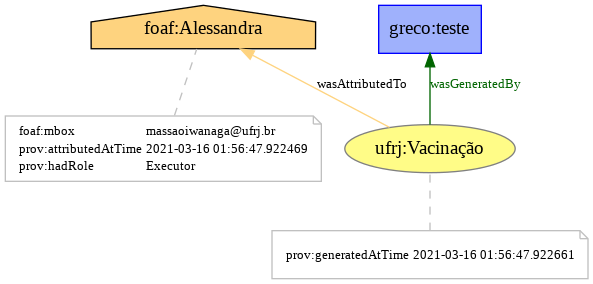

In [15]:
# Adding Vizualization the provenance graph in the Jupyter notebook
from IPython.display import Image
Image('/content/drive/My Drive/TESI_FCD/'+graph)

## Variáveis gerais do trabalho proposto

In [4]:
## Merge entre os dataFrames de Vacinação e CNES# UFs das regiões norte e sudeste, que serão analisadas no trabalho

UFs = ['RJ', 'SP','MG', 'ES', 'AM', 'AC', 'AP', 'PA', 'RO', 'RR']

## Importação e tratamento do DataSet de Vacinação

In [5]:
# Salve o dataset de vacinação no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_vacinacao = pd.read_csv('/content/drive/My Drive/TESI_FCD/part-00000-090405dc-80c4-4889-84c3-a9a390d06947-c000.csv',delimiter=',')

### Exploração inicial do DataSet de Vacinação

In [6]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset
print('')
print(df_vacinacao.info())  # Informações sobre o dataset 

# Observe o total de linhas e o total de colunas (33) do dataset

Total de registros: 6883254

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6883254 entries, 0 to 6883253
Data columns (total 33 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     object 
 13  paciente_nacionalidade_enumN

In [7]:
df_vacinacao.head(10)        # Visualização dos registros iniciais

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_razaoSocial,estalecimento_noFantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataAplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds
0,4613b9c7-4771-47ec-8e94-5b93fa818a08-i0b0,5b63573558358a0de47cbe04f463cb613a55e65551a927...,63.0,1957-11-08,M,99.0,SEM INFORMACAO,353440,10,OSASCO,BRASIL,SP,06278,B,2788500,PREFEITURA DO MUNICIPIO DE SAO PAULO,UBS RIO PEQUENO PAULO DE BARROS FRANCA,355030.0,SAO PAULO,SP,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,202010026,Sinovac,NaN,2021-01-22T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,VACIVIDA,2021-01-22 14:01:33
1,f80a0494-421d-4db5-9f5c-3002fc8f2ff6-i0b0,a8286adbaf3b99468d5d6e8b06ad710cbe860c551ff047...,57.0,1963-01-23,F,1.0,BRANCA,353540,10,PANORAMA,BRASIL,SP,17980,B,2750376,PREFEITURA MUNICIPAL DE PANORAMA,CENTRO DE SAUDE III DE PANORAMA,353540.0,PANORAMA,SP,926,Outros,9.0,Trabalhadores de Saúde,202010033,Sinovac,NaN,2021-01-22T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,VACIVIDA,2021-01-22 06:01:22
2,82b038e5-947b-4b23-8892-c0b0fd87e13b-i0b0,bf05d8af87970669c8472eb42fbf593614b353e04421b0...,21.0,1999-12-18,M,5.0,INDIGENA,130080,10,BORBA,BRASIL,AM,"\\""""",B,7026153,MINISTERIO DA SAUDE,DISTRITO SANITARIO ESPECIAL INDIGENA MANAUS,130260.0,MANAUS,AM,701,Povos indígenas em terras indígenas,7.0,Povos Indígenas,202010025,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-25T03:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-02-07 00:53:22
3,a8734b25-c402-4c7b-8b18-27d5b231769d-i0b0,350875b9acab7329c4d8ed2341918fe20c89c7c941a251...,32.0,1988-04-29,F,3.0,PARDA,520450,10,CALDAS NOVAS,BRASIL,GO,"\\""""",B,9014578,MUNICIPIO DE REDENCAO,VIRGINIA MOURA SANTIAGO,150613.0,REDENCAO,PA,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,202010028,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-20T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-01-28 19:49:02
4,16932eed-d033-4b1f-8bed-60dc361fbc47-i0b0,ab6df33f347f8aff82de72403ed80fe585854e2b0f7f5b...,71.0,1949-09-01,F,99.0,SEM INFORMACAO,211130,10,SAO LUIS,BRASIL,MA,"\\""""",B,7071116,FUNDO MUNICIPAL DE SAUDE,CENTRO DE SAUDE DRA VALDECY ELEOTERIA MARTINS,211130.0,SAO LUIS,MA,926,Outros,9.0,Trabalhadores de Saúde,202009011,FUNDACAO BUTANTAN,Organization/61189445000156,2021-01-21T00:00:00.000Z,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-01-24 21:03:29
5,c0ccfafc-4a8a-4be9-a8a6-2a6a9c3bf680-i0b0,57b9d2434299430f8f17dea29006d74f06c0ab93b09ed4...,44.0,1976-05-12,F,3.0,PARDA,421830,10,TRES BARRAS,BRASIL,SC,"\\""""",B,9109331,MUNICIPIO DE TRES BARRAS,UNIDADE SANITARIA DE SAUDE PEDRO TOPOROSKI,421830.0,TRES BARRAS,SC,923,Técnico de Enfermagem,9.0,Trabalhadores de Saúde,4120Z005,FUNDACAO OSWALDO CRUZ,Organization/33781055000135,2021-01-29T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,Novo PNI,2021-01-29 18:32:22
6,c280451f-9fac-4218-a8a9-58b261d6707b-i0b0,2200a28fb948cbb229ea5a44dccecd7f6acd4f4f8da893...,38.0,1983-01-07,F,1.0,BRANCA,355030,10,SAO PAULO,BRASIL,SP,04891,B,2751887,PREFEITURA DO MUNICIPIO DE SAO PAULO,UBS JARDIM CLIPER,355030.0,SAO PAULO,SP,926,Outros,9.0,Trabalhadores de Saúde,4120Z005,AstraZeneca/Oxford,NaN,2021-01-29T00:00:00.000Z,1ª Dose,85,Vacina Covid-19 - Covishield,VACIVIDA,2021-01-29 05:01:05
7,5f8a911f-f9be-47d2-a132-0617c9878e0d-i0b0,43486e18a0ec87ecd53952361567242eb3cbb5306b7a18...,68.0,1952-11

### Eliminação de colunas e linhas que não serão utilizadas - Dataset Vacinação

In [8]:
# Eliminação das colunas que não serão utilizadas nas análises

df_vacinacao = df_vacinacao.drop(['paciente_endereco_cep','estabelecimento_razaoSocial','estalecimento_noFantasia','vacina_lote','vacina_fabricante_referencia',
                                  'vacina_codigo','sistema_origem'],axis=1)

In [9]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe
df_vacinacao = df_vacinacao.loc[(df_vacinacao['estabelecimento_uf'].isin(UFs))]

In [10]:
print('Total de registros:',len(df_vacinacao))    # Quantidade de registros do dataset após eliminação de linhas

print('')
print(df_vacinacao.info())                        # Informações sobre o dataset

## É possível observar a redução do número total de linhas e do número total de colunas (26) do dataset

Total de registros: 3934511

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3934511 entries, 0 to 6883252
Data columns (total 26 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_nacionalidade_enumNacionalidade  object 
 13  estabelecimento_valor       

### Tratamento de valores nulos e/ou faltantes

In [11]:
df_vacinacao.count()        # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      #    tratamento de dados se essas colunas forem necessárias para análise

document_id                                 3934511
paciente_id                                 3934511
paciente_idade                              3934511
paciente_dataNascimento                     3934511
paciente_enumSexoBiologico                  3934511
paciente_racaCor_codigo                     3934511
paciente_racaCor_valor                      3934511
paciente_endereco_coIbgeMunicipio           3934511
paciente_endereco_coPais                    3934511
paciente_endereco_nmMunicipio               3934511
paciente_endereco_nmPais                    3934511
paciente_endereco_uf                        3934511
paciente_nacionalidade_enumNacionalidade    3928546
estabelecimento_valor                       3934511
estabelecimento_municipio_codigo            3934511
estabelecimento_municipio_nome              3934511
estabelecimento_uf                          3934511
vacina_grupoAtendimento_codigo              3934511
vacina_grupoAtendimento_nome                3876558
vacina_categ

In [ ]:
# falta incluir tratamento de nulos e valores faltantes

### Identificação e tratamento de valores duplicados

In [ ]:
# falta incluir tratamento de valores duplicados

##Teste inicial de gráfico

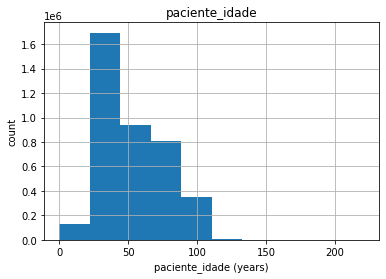

In [24]:
# Plot 'Idade' variable in a histogram

pd.DataFrame.hist(df_vacinacao[['paciente_idade']])

plt.xlabel('paciente_idade (years)')

plt.ylabel('count')

plt.show()

## Importação e tratamento do Dataset de Estabelecimentos de Saúde (CNES)

In [12]:
# Salve o dataset de CNES no diretório TESI_FCD no Google Drive
# Para tornar o notebook reutilizável, futuramente pode-se solicitar o diretório e o nome do dataset via prompt.

df_cnes = pd.read_csv('/content/drive/My Drive/TESI_FCD/cnes_ativonone.csv',delimiter=',')

### Exploração inicial do DataSet de Estabelecimentos de Saúde (CNES)

In [13]:
print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset
print('')
print(df_cnes.info())                        # Informações sobre o dataset 

# Observe o total de linhas e o total de colunas (12) do dataset

Total de registros: 354804

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354804 entries, 0 to 354803
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          354804 non-null  int64 
 1   co_ibge          354804 non-null  int64 
 2   no_fantasia      354796 non-null  object
 3   ds_tipo_unidade  354804 non-null  object
 4   tp_gestao        354804 non-null  object
 5   no_logradouro    354804 non-null  object
 6   nu_endereco      354517 non-null  object
 7   no_bairro        354801 non-null  object
 8   co_cep           354804 non-null  int64 
 9   uf               354434 non-null  object
 10  municipio        354434 non-null  object
 11  nu_telefone      279394 non-null  object
dtypes: int64(3), object(9)
memory usage: 32.5+ MB
None


In [14]:
df_cnes.head(10)        # Visualização dos registros iniciais

,co_cnes,co_ibge,no_fantasia,ds_tipo_unidade,tp_gestao,no_logradouro,nu_endereco,no_bairro,co_cep,uf,municipio,nu_telefone
0,6577687,292240,SECRETARIA DE SAUDE DE MUTUIPE,CENTRAL DE GESTAO EM SAUDE,M,RUA RUY BARBOSA,S/N,CENTRO,45480000,BA,Mutuípe,NaN
1,6578500,500210,REABILIT CONSULTORIO DE FISIOTERAPIA,CLINICA/CENTRO DE ESPECIALIDADE,M,ALMIRANTE BARROSO,S/N,CENTRO,79260000,MS,Bela Vista,NaN
2,6577725,355660,SECRETARIA MUNICIPAL DE SAUDE E HIGIENE DE VER...,CENTRAL DE GESTAO EM SAUDE,M,RUA PAULO GUERREIRO FRANCO,997,CENTRO,17560000,SP,Vera Cruz,NaN
3,6577733,355410,CONS SERGIO LUIZ TEIXEIRA M PERES,CONSULTORIO ISOLADO,M,PCA MONS SILVA BARROS,254,CENTRO,12020070,SP,Taubaté,36351489
4,6577768,410490,LABORATORIO DOFF SOTTA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA DR JORGE XAVIER DA SILVA,1078,CENTRO,84165000,PR,Castro,3232-4854
5,6577806,420245,SAMU BOMBINHAS,UNIDADE MOVEL DE NIVEL PRE-HOSPITALAR NA AREA ...,M,RUA CACHALOTE,589,MORRINHOS,88215000,SC,Bombinhas,33934363
6,6577830,240260,CENTRO DE ATENCAO PSICOSSOCIAL CAPS II,CENTRO DE ATENCAO PSICOSSOCIAL,M,RUA POETISA DOLORES,13,CENTRO,59570000,RN,Ceará-Mirim,(84)3274-5914
7,6577865,315960,DIMENSAO CLINICA MEDICA,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA CEL GABRIEL CAPISTRANO,256,CENTRO,37540000,MG,Santa Rita do Sapucaí,3534713531
8,6577873,355670,JULIANA PEREIRA PERSI,UNIDADE DE APOIO DIAGNOSE E TERAPIA (SADT ISOL...,M,RUA ROCINHA,213,CAPELA,13280000,SP,Vinhedo,38764932
9,6577881,231330,CENTRAL DE CONSULTORIOS,CLINICA/CENTRO DE ESPECIALIDADE,M,RUA MAFISA CIDRAO ROCHA,63,CENTRO,63660000,CE,Tauá,88-34371097


In [60]:
#df_cnes.columns

Index(['co_cnes', 'no_fantasia', 'ds_tipo_unidade', 'tp_gestao', 'uf'], dtype='object')

### Eliminação de colunas e linhas que não serão utilizadas - Dataset Estabelecimentos de Saúde (CNES)

In [15]:
# Eliminação das colunas que não serão utilizadas nas análises

df_cnes = df_cnes.drop(['co_ibge','no_logradouro','nu_endereco','no_bairro','co_cep', 'municipio','nu_telefone'],axis=1)

In [66]:
#df_cnes.columns

In [16]:
# Como o dataset possui dados de todo o Brasil, os estados que não pertencem às regiões selecionadas para análise serão eliminados do dataframe
df_cnes = df_cnes.loc[(df_cnes['uf'].isin(UFs))]

print('Total de registros:',len(df_cnes))    # Quantidade de registros do dataset após eliminação de linhas
print('')
print(df_cnes.info())                        # Informações sobre o dataset 

## É possível observar a redução do número total de linhas e do número total de colunas (5) do dataset

Total de registros: 181213

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181213 entries, 2 to 354803
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   co_cnes          181213 non-null  int64 
 1   no_fantasia      181208 non-null  object
 2   ds_tipo_unidade  181213 non-null  object
 3   tp_gestao        181213 non-null  object
 4   uf               181213 non-null  object
dtypes: int64(1), object(4)
memory usage: 8.3+ MB
None


### Tratamento de valores nulos e/ou faltantes

In [68]:
df_cnes.count()        # Quantidade de registros por coluna. 
                      # É possível observar que algumas colunas possuem quatidade inferior de registros, o que indica que será necessário 
                      #    tratamento de dados se essas colunas forem necessárias para análise

co_cnes            181213
no_fantasia        181208
ds_tipo_unidade    181213
tp_gestao          181213
uf                 181213
dtype: int64

In [ ]:
# falta incluir tratamento de nulos e valores faltantes

### Identificação e tratamento de valores duplicados

In [ ]:
# falta incluir tratamento de nulos e valores faltantes

## Merge entre os dataFrames de Vacinação e CNES

In [17]:
pd.merge(df_vacinacao, df_cnes, on=None, left_on='estabelecimento_valor', right_on='co_cnes')

,document_id,paciente_id,paciente_idade,paciente_dataNascimento,paciente_enumSexoBiologico,paciente_racaCor_codigo,paciente_racaCor_valor,paciente_endereco_coIbgeMunicipio,paciente_endereco_coPais,paciente_endereco_nmMunicipio,paciente_endereco_nmPais,paciente_endereco_uf,paciente_nacionalidade_enumNacionalidade,estabelecimento_valor,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoAtendimento_codigo,vacina_grupoAtendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose,vacina_nome,data_importacao_rnds,co_cnes,no_fantasia,ds_tipo_unidade,tp_gestao,uf
0,4613b9c7-4771-47ec-8e94-5b93fa818a08-i0b0,5b63573558358a0de47cbe04f463cb613a55e65551a927...,63.0,1957-11-08,M,99.0,SEM INFORMACAO,353440,10,OSASCO,BRASIL,SP,B,2788500,355030.0,SAO PAULO,SP,201,Pessoas de 60 a 64 anos,2.0,Faixa Etária,Sinovac,2021-01-22T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-22 14:01:33,2788500,UBS RIO PEQUENO PAULO DE BARROS FRANCA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
1,a152deb1-5117-4ecb-a668-e05d0299aaf8-i0b0,7e894e8e77bcebac26e780c593cdf93e50fb4e3d7a71c4...,91.0,1929-11-17,M,99.0,SEM INFORMACAO,355030,10,SAO PAULO,BRASIL,SP,B,2788500,355030.0,SAO PAULO,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-02-10T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-10 15:02:00,2788500,UBS RIO PEQUENO PAULO DE BARROS FRANCA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
2,5b2088d9-82dc-4cf9-a631-8a8afaf663db-i0b0,b359a91f0437a87468d9279d61ae99e8d5c77d63ec48e8...,84.0,1936-06-02,M,99.0,SEM INFORMACAO,355030,10,SAO PAULO,BRASIL,SP,B,2788500,355030.0,SAO PAULO,SP,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,Sinovac,2021-02-19T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-19 15:02:00,2788500,UBS RIO PEQUENO PAULO DE BARROS FRANCA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
3,408cb6f0-73e3-460c-9950-91cdf65aff7a-i0b0,050753b2afbe6af3c0b070772e964129418ed195dd57c5...,71.0,1950-02-18,F,1.0,BRANCA,351300,10,COTIA,BRASIL,SP,B,2788500,355030.0,SAO PAULO,SP,203,Pessoas de 70 a 74 anos,2.0,Faixa Etária,Sinovac,2021-02-23T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-23 03:00:00,2788500,UBS RIO PEQUENO PAULO DE BARROS FRANCA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
4,8b19fadf-43d3-4540-93e5-2c12ae2b50fd-i0b0,c6df465a9392ef54b4e6dec4ac4139742ea01667f88d7c...,20.0,2000-03-21,F,1.0,BRANCA,355030,10,SAO PAULO,BRASIL,SP,B,2788500,355030.0,SAO PAULO,SP,926,Outros,9.0,Trabalhadores de Saúde,Sinovac,2021-02-24T00:00:00.000Z,2ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-24 03:00:00,2788500,UBS RIO PEQUENO PAULO DE BARROS FRANCA,CENTRO DE SAUDE/UNIDADE BASICA,M,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795901,39668f74-4ed8-4d84-972f-77c1019c3157-i0b0,b680b1708922b1f999364db4a2483f13f1a8e5d618ecbf...,48.0,1972-06-08,F,1.0,BRANCA,312830,10,GUARANESIA,BRASIL,MG,B,2204959,312830.0,GUARANESIA,MG,905,Cuidador de Idosos,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-21T00:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-01-27 05:48:06,2204959,PSF SAUDE E VIDA I,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3795902,2806f6bc-205c-4206-8bd1-bf6ab0ae10e5-i0b0,487ced035fbae6950a655505baf05537cb0c3d93e8c2ec...,90.0,1930-03-31,M,3.0,PARDA,315340,10,PRESIDENTE OLEGARIO,BRASIL,MG,B,3931935,315340.0,PRESIDENTE OLEGARIO,MG,205,Pessoas de 80 anos ou mais,2.0,Faixa Etária,FUNDACAO BUTANTAN,2021-02-17T03:00:00.000Z,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan,2021-02-19 23:53:45,3931935,UNIDADE BASICA DE SAUDE BILE GODINHO,CENTRO DE SAUDE/UNIDADE BASICA,M,MG
3795903,dcfde75c-a00d-47ba-a240-20c9891bfa93-i0b0,6e4b534f5ce061ca0289e7fa4eaa07a9ddc8008dee6e23...,34.0,1986-09-03,F,3.0,PARDA,120020,10,CRUZEIRO DO SUL,BRASIL,AC,B,2000253,120020.0,CRUZEIRO DO SUL,AC,926,Outros,9.0,Trabalhadores de Saúde,FUNDACAO BUTANTAN,2021-01-28T00